In [1]:
#Bayesian inference on a pure birth process X-->2X
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

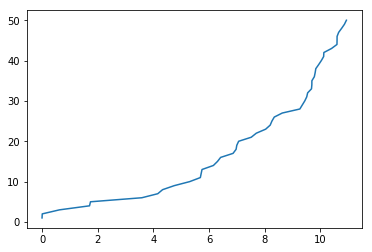

In [2]:
#generate data
trueA = 0.25
N = 50
y=np.zeros(N)
t=np.zeros(N)
y[0]=1
t[0]=0
for i in np.arange(1,N):
    tstep = np.random.exponential(1./(trueA*y[i-1]))
    t[i]=t[i-1]+tstep
    y[i]=y[i-1]+1
plt.plot(t,y)

In [3]:
basic_model = pm.Model()
with basic_model: 
    #priors
    A = pm.Gamma('A',alpha=2.5,beta=10)
    
    #custom likelihood
    def A_like(A,y,N,t):
        w=1
        for i in range(N-1):
            k=A*y[i]*(t[i+1]-t[i])
            w*=A*y[i]*np.exp(-k) 
            #w=A**len(y)*np.exp(-A*t[N-1])
        return w
    
    like = pm.Potential('like',A_like(A,y,N,t))

    
    #instantiate sample
    step = pm.Slice()
    trace = pm.sample(5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
Slice: [A]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:29<00:00, 741.87draws/s] 


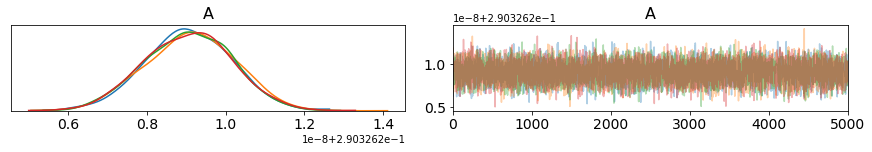

In [4]:
pm.traceplot(trace);

In [5]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
A,0.290326,1.104739e-09,1.211012e-11,0.290326,0.290326,9289.951655,1.000364
